## `Chia dữ liệu thành hai tập huấn luyện và tập kiểm tra : Train và Test theo tỷ lệ 80 : 20  `

In [1]:
import pandas as pd
import joblib

# Đọc file CSV
file_path = '/content/BatDongSan.csv'
df = pd.read_csv(file_path)

# Hiển thị 5 dòng đầu tiên
print(df.head())



  du_an  price_VND status  area  price_m2  toilet  room       doc  \
0   NaN       4.39    NaN  19.0    231.05     3.0   3.0  Đã có sổ   
1   NaN       5.80    NaN  30.0    193.33     4.0   3.0  Đã có sổ   
2   NaN       6.90    NaN  40.0    172.50     4.0   4.0  Đã có sổ   
3   NaN       5.90    NaN  38.0    155.26     0.0   4.0  Đã có sổ   
4   NaN       7.28    NaN  35.0    208.00     4.0   3.0  Đã có sổ   

           type  Số tầng         furnishing category           Đường  \
0  nhà ngõ, hẻm      4.0  Hoàn thiện cơ bản   NhaDat   Đường Thái Hà   
1  nhà ngõ, hẻm      0.0           Không rõ   NhaDat             NaN   
2  nhà ngõ, hẻm      5.0    Nội thất đầy đủ   NhaDat             NaN   
3  nhà ngõ, hẻm      0.0           Không rõ   NhaDat  Đường Lĩnh Nam   
4  nhà ngõ, hẻm      5.0           Không rõ   NhaDat             NaN   

                 Phường             Quận  
0     Phường Trung Liệt     Quận Đống Đa  
1   Phường Khương Trung  Quận Thanh Xuân  
2         Phường Phú La

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Đường dẫn đến tệp dữ liệu
file_path = '/content/BatDongSan.csv'

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv(file_path)

# Chia dữ liệu thành tập train (80%) và validation (20%)
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Lưu hai tập dữ liệu ra file CSV
train_data.to_csv('/content/train.csv', index=False)
val_data.to_csv('/content/test.csv', index=False)

# Hiển thị thông báo
print("Dữ liệu đã được chia thành 2 tập:")
print("- Tập train: train.csv")
print("- Tập validation: val.csv")


Dữ liệu đã được chia thành 2 tập:
- Tập train: train.csv
- Tập validation: val.csv


# Huấn luyện mô hình

In [4]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/train.csv')

# Lọc chỉ các thuộc tính cần thiết
df_filtered = df[
    ['category', 'type', 'Quận', 'furnishing', 'area', 'toilet', 'room', 'Số tầng', 'price_VND']
]

# Mã hóa cột phân loại
categorical_cols = ['category', 'type', 'Quận', 'furnishing']
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder cho từng cột phân loại
for col in categorical_cols:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])

# Các cột số học
numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
X = df_filtered[numerical_cols + categorical_cols].values  # Kết hợp cả cột số và cột đã mã hóa

# Biến mục tiêu
y = df_filtered['price_VND'].values

# Khởi tạo mô hình
model = TweedieRegressor(power=1, alpha=0.5)  # power=1: Poisson regression

# Huấn luyện mô hình
start_train = time.time()
model.fit(X, y)
end_train = time.time()

# Dự đoán
start_test = time.time()
y_pred = model.predict(X)  # Dự đoán trên toàn bộ tập dữ liệu
end_test = time.time()

# Đánh giá mô hình
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Đo độ chính xác (trúng)
threshold = 0.01  # Ngưỡng 1% cho sự khác biệt giữa dự đoán và giá trị thực
correct_predictions = np.sum(np.abs(y_pred - y) / y < threshold)
accuracy = correct_predictions / len(y)

# Tính Relative Error
relative_error = np.mean(np.abs(y_pred - y) / y)

# Tính Standard Deviation
std = np.std(y_pred - y)

# In kết quả
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Relative Error: {relative_error:.4f}")
print(f"Standard Deviation: {std:.4f}")

# Thời gian tổng cộng
total_time = (end_train - start_train) + (end_test - start_test)
print(f"Total Time: {total_time:.2f} s")

# Training time in milliseconds
training_time_ms = (end_train - start_train) * 1000
print(f"Training Time (ms): {training_time_ms:.2f}")

# Lưu mô hình
model_filename = 'Generalized_Linear_Model_model.pkl'
joblib.dump(model, model_filename)
print(f"Mô hình đã được lưu tại: {model_filename}")



MSE: 6.29
MAE: 1.79
R²: 0.45
Accuracy: 0.03
Relative Error: 2.9282
Standard Deviation: 2.5088
Total Time: 0.08 s
Training Time (ms): 77.67
Mô hình đã được lưu tại: Generalized_Linear_Model_model.pkl


<ipython-input-4-e46701b76b8f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
<ipython-input-4-e46701b76b8f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
<ipython-input-4-e46701b76b8f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [5]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/train.csv')

# Lọc chỉ các thuộc tính cần thiết
df_filtered = df[
    ['category', 'type', 'Quận', 'furnishing', 'area', 'toilet', 'room', 'Số tầng', 'price_VND']
]

# Mã hóa cột phân loại sử dụng LabelEncoder
categorical_cols = ['type', 'category', 'Quận', 'furnishing']
encoder = LabelEncoder()

# Áp dụng LabelEncoder cho từng cột phân loại
for col in categorical_cols:
    df_filtered[col] = encoder.fit_transform(df_filtered[col])

# Gộp dữ liệu đã mã hóa với các cột số
numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
X = df_filtered[numerical_cols + categorical_cols].values

# Biến mục tiêu
y = df_filtered['price_VND'].values

# Tách dữ liệu thành 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()

# Lưu mô hình sau khi huấn luyện
joblib.dump(model, 'random_forest_model.joblib')
print("Mô hình Random Forest đã được lưu thành công!")

# Dự đoán
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Tính các chỉ số mới
relative_error = np.mean(np.abs(y_pred - y_test) / y_test)
std_dev = np.std(y_pred - y_test)

# Thời gian huấn luyện và kiểm tra
training_time = end_train - start_train
testing_time = end_test - start_test

# Thời gian tổng cộng
total_time = training_time + testing_time
training_time_ms = training_time * 1000

# In kết quả
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Relative Error: {relative_error:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Training Time: {training_time:.2f} s")
print(f"Testing Time: {testing_time:.2f} s")
print(f"Training Time (ms): {training_time_ms:.2f}")
print(f"Total Time: {total_time:.2f} s")



<ipython-input-5-ddb355fc625f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-5-ddb355fc625f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-5-ddb355fc625f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Mô hình Random Forest đã được lưu thành công!
Mean Squared Error: 4.27
Mean Absolute Error: 1.37
Relative Error: 2.2928
Standard Deviation: 2.0659
Training Time: 1.39 s
Testing Time: 0.05 s
Training Time (ms): 1392.01
Total Time: 1.44 s


In [6]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/train.csv')

# Lọc chỉ các thuộc tính cần thiết
df_filtered = df[
    ['category', 'type', 'Quận', 'furnishing', 'area', 'toilet', 'room', 'Số tầng', 'price_VND']
]

# Mã hóa cột phân loại sử dụng LabelEncoder
categorical_cols = ['type', 'category', 'Quận', 'furnishing']
encoder = LabelEncoder()

# Áp dụng LabelEncoder cho từng cột phân loại
for col in categorical_cols:
    df_filtered[col] = encoder.fit_transform(df_filtered[col])

# Gộp dữ liệu đã mã hóa với các cột số
numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
X = df_filtered[numerical_cols + categorical_cols].values

# Biến mục tiêu
y = df_filtered['price_VND'].values

# Xây dựng mô hình Decision Tree
model = DecisionTreeRegressor(random_state=42)

# Huấn luyện mô hình
start_train = time.time()
model.fit(X, y)
end_train = time.time()

# Lưu mô hình sau khi huấn luyện
joblib.dump(model, 'decision_tree_model.joblib')
print("Mô hình đã được lưu thành công!")

# Dự đoán trên cùng một tập dữ liệu
start_test = time.time()
y_pred = model.predict(X)
end_test = time.time()

# Đánh giá mô hình
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Tính các chỉ số mới
relative_error = np.mean(np.abs(y_pred - y) / y)
std_dev = np.std(y_pred - y)

# Tính R² (độ chính xác)
r2 = r2_score(y, y_pred)

# Thời gian huấn luyện và kiểm tra
training_time = end_train - start_train
testing_time = end_test - start_test

# Thời gian tổng cộng
total_time = training_time + testing_time
training_time_ms = training_time * 1000

# In kết quả
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Relative Error: {relative_error:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"R²: {r2:.4f}")  # In độ chính xác
print(f"Training Time: {training_time:.2f} s")
print(f"Testing Time: {testing_time:.2f} s")
print(f"Training Time (ms): {training_time_ms:.2f}")
print(f"Total Time: {total_time:.2f} s")



Mô hình đã được lưu thành công!
Mean Squared Error: 0.69
Mean Absolute Error: 0.30
Relative Error: 0.3376
Standard Deviation: 0.8290
R²: 0.9397
Training Time: 0.02 s
Testing Time: 0.00 s
Training Time (ms): 20.88
Total Time: 0.02 s


<ipython-input-6-ef3bfca9d460>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-6-ef3bfca9d460>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-6-ef3bfca9d460>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [7]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/train.csv')

# Lọc chỉ các thuộc tính cần thiết
df_filtered = df[
    ['category', 'type', 'Quận', 'furnishing', 'area', 'toilet', 'room', 'Số tầng', 'price_VND']
]

# Mã hóa cột phân loại sử dụng LabelEncoder
categorical_cols = ['type', 'category', 'Quận', 'furnishing']
encoder = LabelEncoder()

# Áp dụng LabelEncoder cho từng cột phân loại
for col in categorical_cols:
    df_filtered[col] = encoder.fit_transform(df_filtered[col])

# Gộp dữ liệu đã mã hóa với các cột số
numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
X = df_filtered[numerical_cols + categorical_cols].values

# Biến mục tiêu
y = df_filtered['price_VND'].values

# Tách dữ liệu thành 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Gradient Boosted Trees
model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)

# Huấn luyện mô hình
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()

# Lưu mô hình sau khi huấn luyện
joblib.dump(model, 'gradient_boosted_trees_model.joblib')
print("Mô hình Gradient Boosted Trees đã được lưu thành công!")

# Dự đoán
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Tính các chỉ số mới
relative_error = np.mean(np.abs(y_pred - y_test) / y_test)
std_dev = np.std(y_pred - y_test)

# Thời gian huấn luyện và kiểm tra
training_time = end_train - start_train
testing_time = end_test - start_test

# Thời gian tổng cộng
total_time = training_time + testing_time
training_time_ms = training_time * 1000

# In kết quả
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Relative Error: {relative_error:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Training Time: {training_time:.2f} s")
print(f"Testing Time: {testing_time:.2f} s")
print(f"Training Time (ms): {training_time_ms:.2f}")
print(f"Total Time: {total_time:.2f} s")




<ipython-input-7-8e9555b048f6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-7-8e9555b048f6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-7-8e9555b048f6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Mô hình Gradient Boosted Trees đã được lưu thành công!
Mean Squared Error: 4.08
Mean Absolute Error: 1.41
Relative Error: 2.2121
Standard Deviation: 2.0210
Training Time: 0.41 s
Testing Time: 0.00 s
Training Time (ms): 414.35
Total Time: 0.42 s


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import time
import joblib

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/train.csv')

# Lọc chỉ các thuộc tính cần thiết
df_filtered = df[['category', 'type', 'Quận', 'furnishing', 'area', 'toilet', 'room', 'Số tầng', 'price_VND']]

# Mã hóa cột phân loại sử dụng LabelEncoder
categorical_cols = ['type', 'category', 'Quận', 'furnishing']
encoder = LabelEncoder()

# Áp dụng LabelEncoder cho từng cột phân loại
for col in categorical_cols:
    df_filtered[col] = encoder.fit_transform(df_filtered[col])

# Gộp dữ liệu đã mã hóa với các cột số
numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
X = df_filtered[numerical_cols + categorical_cols].values

# Biến mục tiêu
y = df_filtered['price_VND'].values

# Tách dữ liệu thành 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình XGBoost
model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Huấn luyện mô hình
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()

# Lưu mô hình sau khi huấn luyện
joblib.dump(model, 'xgboost_model.joblib')
print("Mô hình XGBoost đã được lưu thành công!")

# Dự đoán
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Tính các chỉ số mới
relative_error = np.mean(np.abs(y_pred - y_test) / y_test)
std_dev = np.std(y_pred - y_test)

# Thời gian huấn luyện và kiểm tra
training_time = end_train - start_train
testing_time = end_test - start_test

# Thời gian tổng cộng
total_time = training_time + testing_time
training_time_ms = training_time * 1000

# In kết quả
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Relative Error: {relative_error:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Training Time: {training_time:.2f} s")
print(f"Testing Time: {testing_time:.2f} s")
print(f"Training Time (1,000): {training_time_ms:.2f} ms")
print(f"Total Time: {total_time:.2f} s")


<ipython-input-8-8b11ec07812c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-8-8b11ec07812c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-8-8b11ec07812c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Mô hình XGBoost đã được lưu thành công!
Mean Squared Error: 3.88
Mean Absolute Error: 1.35
Relative Error: 2.3122
Standard Deviation: 1.9688
Training Time: 2.39 s
Testing Time: 0.05 s
Training Time (1,000): 2385.82 ms
Total Time: 2.44 s


In [9]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Khởi tạo các đối tượng LabelEncoder
category_encoder = LabelEncoder()
type_encoder = LabelEncoder()
district_encoder = LabelEncoder()
furnishing_encoder = LabelEncoder()

# Huấn luyện các encoder trên các cột phân loại của DataFrame df
category_encoder.fit(df['category'].dropna())  # Fit cho cột 'category'
type_encoder.fit(df['type'].dropna())  # Fit cho cột 'type'
district_encoder.fit(df['Quận'].dropna())  # Fit cho cột 'Quận'
furnishing_encoder.fit(df['furnishing'].dropna())  # Fit cho cột 'furnishing'

# Lưu các encoder vào các tệp .pkl
joblib.dump(type_encoder, '/content/type_encoder.pkl')
joblib.dump(category_encoder, '/content/category_encoder.pkl')
joblib.dump(district_encoder, '/content/district_encoder.pkl')
joblib.dump(furnishing_encoder, '/content/furnishing_encoder.pkl')

print("Các encoder đã được lưu thành công!")


Các encoder đã được lưu thành công!


# `Kiểm thử `

Bảng so sánh độ chính xác của các mô hình trên tập huấn luyện 
                   Model     MSE   MAE  Relative Error
  Gradient Boosted Trees    3.83  1.36            2.49
           Random Forest    1.71  0.79            1.32
           Decision Tree    0.69  0.30            0.34
Generalized Linear Model 3417.15 31.44           22.23
           Xgboost Model    2.83  1.14            2.29


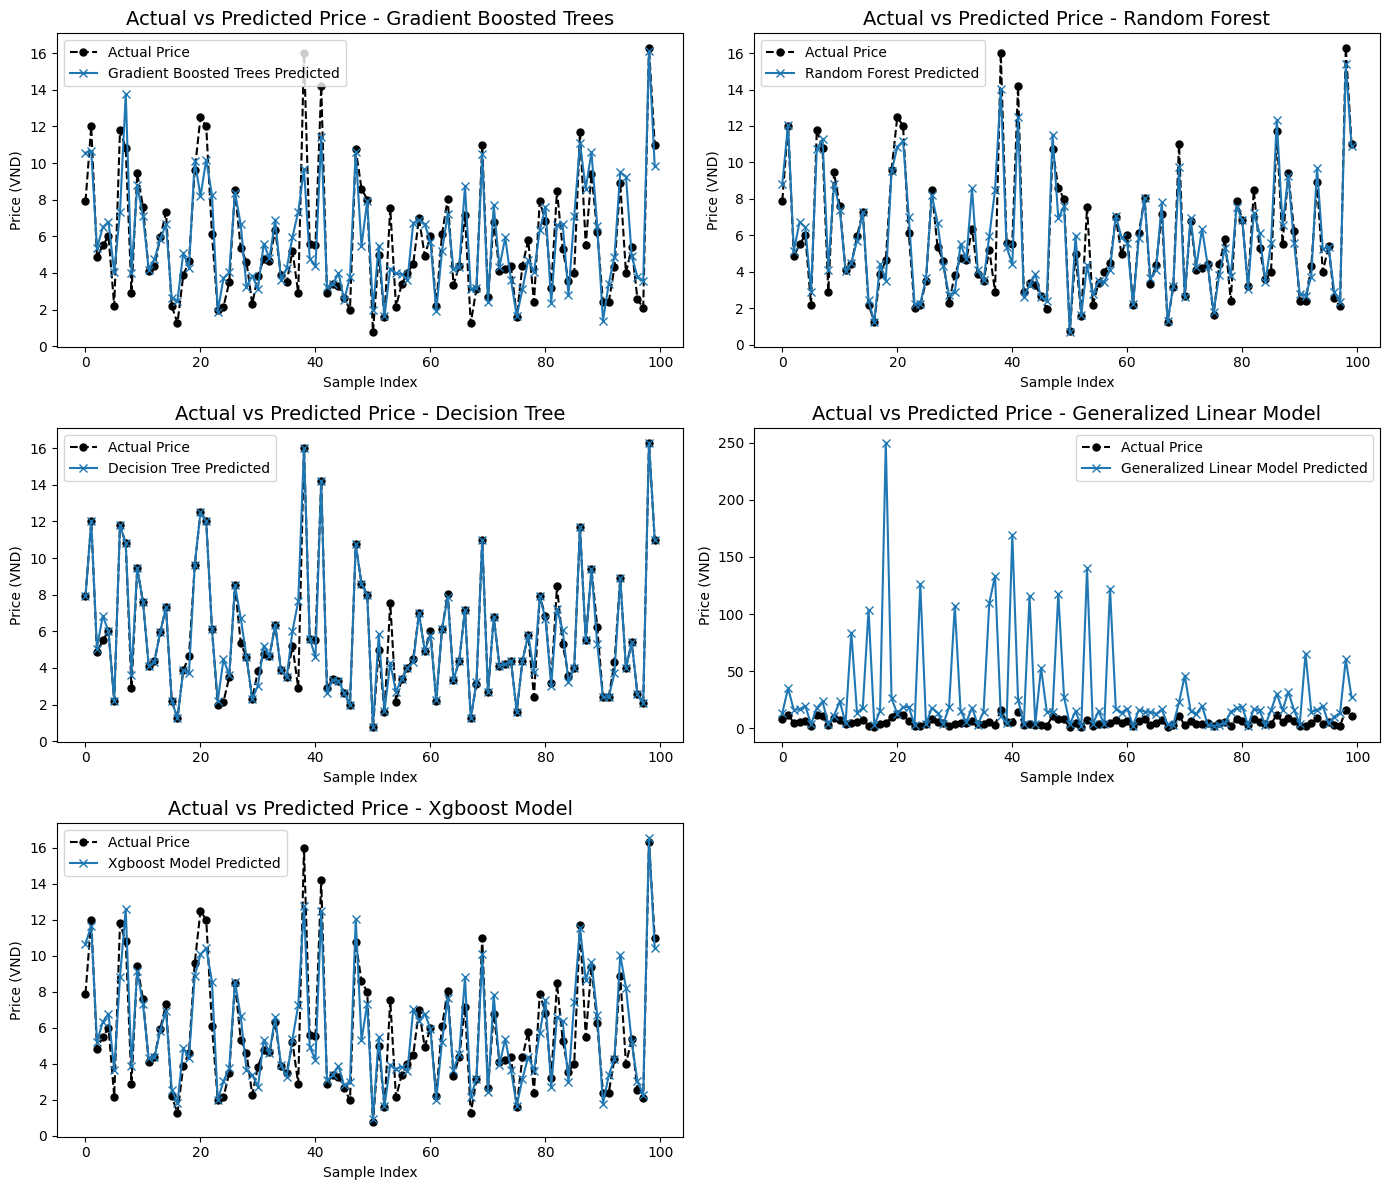

In [15]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/train.csv')

# Chuẩn bị dữ liệu từ dataframe df
df.fillna({
    'Đường': 'Không rõ',
    'furnishing': 'Không rõ'
}, inplace=True)

# Lọc chỉ các thuộc tính cần thiết
df_filtered = df[['category', 'type', 'Quận', 'furnishing', 'area', 'toilet', 'room', 'Số tầng', 'price_VND']].copy()

# Mã hóa cột phân loại bằng LabelEncoder
categorical_cols = ['type', 'category', 'Quận', 'furnishing']
encoder = LabelEncoder()

# Áp dụng LabelEncoder cho từng cột phân loại
for col in categorical_cols:
    df_filtered[col] = encoder.fit_transform(df_filtered[col])

# Gộp dữ liệu đã mã hóa với các cột số
numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
X = df_filtered[numerical_cols + categorical_cols].values

# Biến mục tiêu
y = df_filtered['price_VND'].values

# Tạo hàm đánh giá mô hình
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    relative_error = np.mean(np.abs(y_pred - y) / y)
    return y_pred, mse, mae, relative_error

# Bảng kết quả
results = []

# Đánh giá từng mô hình
model_paths = {
    "Gradient Boosted Trees": '/content/gradient_boosted_trees_model.joblib',
    "Random Forest": '/content/random_forest_model.joblib',
    "Decision Tree": '/content/decision_tree_model.joblib',
    "Generalized Linear Model": '/content/Generalized_Linear_Model_model.pkl',
    "Xgboost Model": '/content/xgboost_model.joblib'
}

for model_name, path in model_paths.items():
    model = joblib.load(path)
    y_pred, mse, mae, rel_err = evaluate_model(model, X, y, model_name)
    results.append({"Model": model_name, "MSE": mse, "MAE": mae, "Relative Error": rel_err})

# Chuyển đổi kết quả thành dataframe
results_df = pd.DataFrame(results)
# In tên bảng kết quả
print("Bảng so sánh độ chính xác của các mô hình trên tập huấn luyện ")
# Định dạng bảng kết quả đẹp mắt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
results_df = results_df.round({"MSE": 2, "MAE": 2, "Relative Error": 2})
# In kết quả
print(results_df.to_string(index=False))

# Vẽ 5 biểu đồ riêng biệt so sánh giữa giá thực tế và giá dự báo cho từng mô hình
models = list(model_paths.keys())
y_preds = [joblib.load(path).predict(X)[:100] for path in model_paths.values()]

plt.figure(figsize=(14, 12))
for i, model in enumerate(models):
    plt.subplot(3, 2, i + 1)
    plt.plot(y[:100], label="Actual Price", color='black', linestyle='--', marker='o', markersize=5)
    plt.plot(y_preds[i], label=f"{model} Predicted", linestyle='-', marker='x')
    plt.title(f'Actual vs Predicted Price - {model}', fontsize=14)
    plt.xlabel('Sample Index')
    plt.ylabel('Price (VND)')
    plt.legend()

plt.tight_layout()
plt.show()


Bảng so sánh độ chính xác của các mô hình trên tập kiểm tra
                   Model    MSE   MAE  Relative Error
  Gradient Boosted Trees   4.23  1.43            3.68
           Random Forest   5.46  1.65            4.09
           Decision Tree  11.29  2.24            6.46
Generalized Linear Model 785.45 13.92           20.96
           Xgboost Model   5.22  1.62            4.15


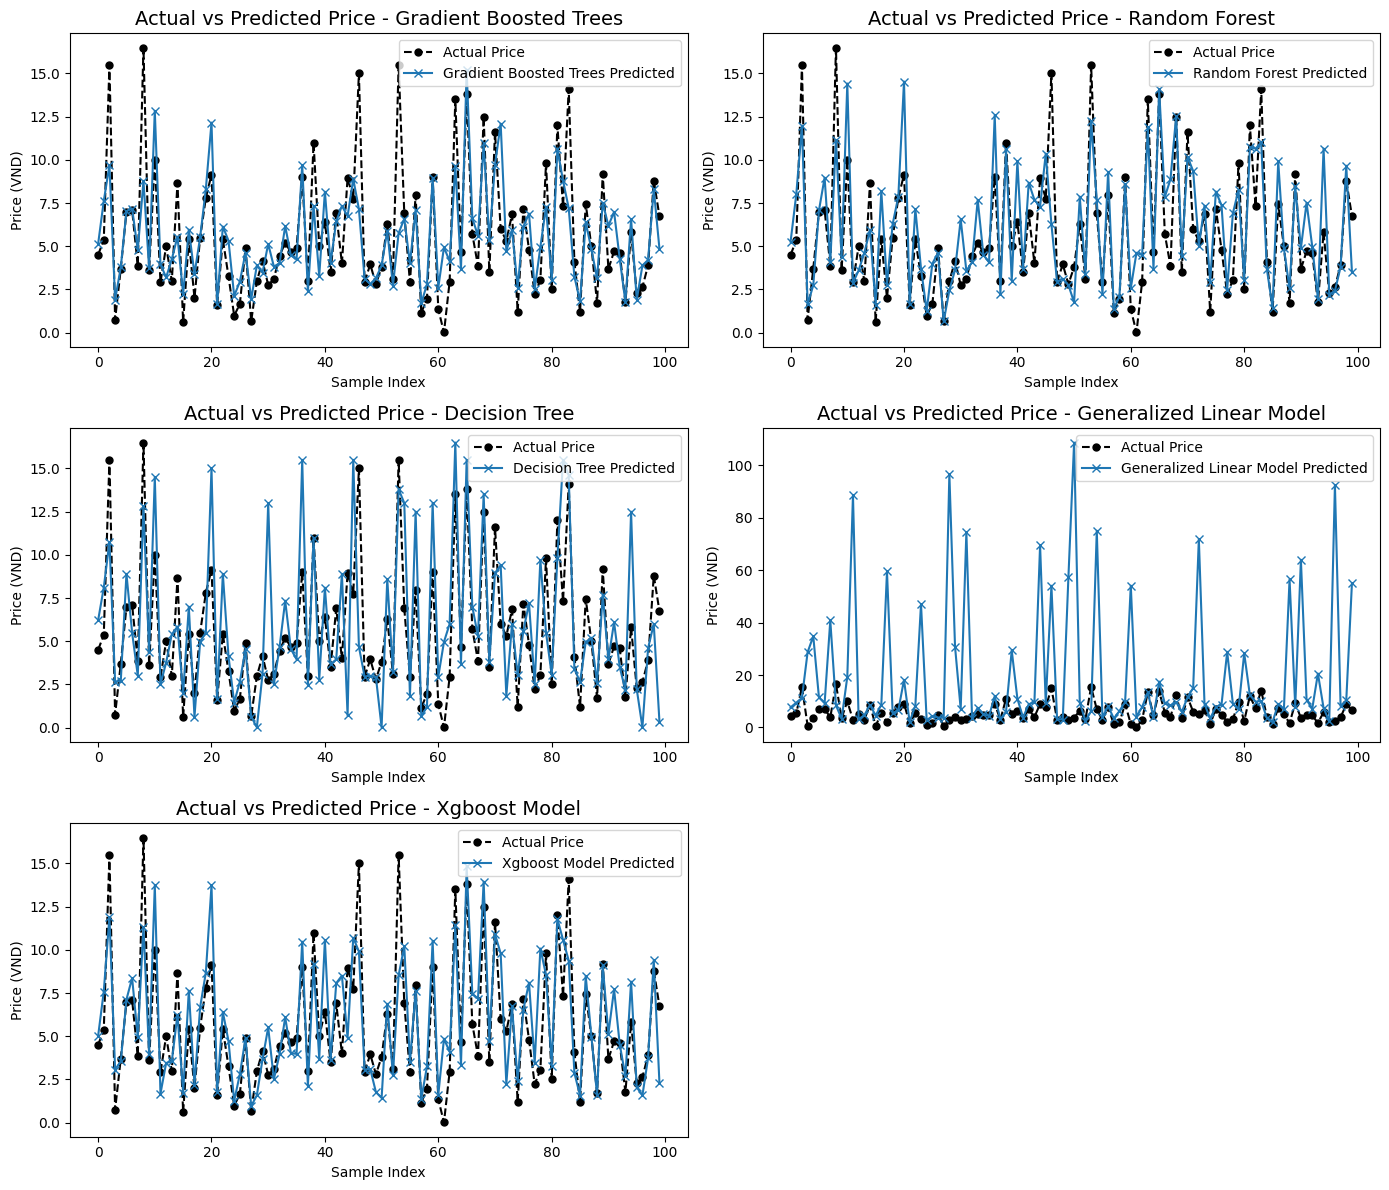

In [16]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/test.csv')

# Chuẩn bị dữ liệu từ dataframe df
df.fillna({
    'Đường': 'Không rõ',
    'furnishing': 'Không rõ'
}, inplace=True)

# Lọc chỉ các thuộc tính cần thiết
df_filtered = df[['category', 'type', 'Quận', 'furnishing', 'area', 'toilet', 'room', 'Số tầng', 'price_VND']].copy()

# Mã hóa cột phân loại bằng LabelEncoder
categorical_cols = ['type', 'category', 'Quận', 'furnishing']
encoder = LabelEncoder()

# Áp dụng LabelEncoder cho từng cột phân loại
for col in categorical_cols:
    df_filtered[col] = encoder.fit_transform(df_filtered[col])

# Gộp dữ liệu đã mã hóa với các cột số
numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
X = df_filtered[numerical_cols + categorical_cols].values

# Biến mục tiêu
y = df_filtered['price_VND'].values

# Tạo hàm đánh giá mô hình
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    relative_error = np.mean(np.abs(y_pred - y) / y)
    return y_pred, mse, mae, relative_error

# Bảng kết quả
results = []

# Đánh giá từng mô hình
model_paths = {
    "Gradient Boosted Trees": '/content/gradient_boosted_trees_model.joblib',
    "Random Forest": '/content/random_forest_model.joblib',
    "Decision Tree": '/content/decision_tree_model.joblib',
    "Generalized Linear Model": '/content/Generalized_Linear_Model_model.pkl',
    "Xgboost Model": '/content/xgboost_model.joblib'
}

for model_name, path in model_paths.items():
    model = joblib.load(path)
    y_pred, mse, mae, rel_err = evaluate_model(model, X, y, model_name)
    results.append({"Model": model_name, "MSE": mse, "MAE": mae, "Relative Error": rel_err})

# Chuyển đổi kết quả thành dataframe
results_df = pd.DataFrame(results)
print("Bảng so sánh độ chính xác của các mô hình trên tập kiểm tra")
# Định dạng bảng kết quả đẹp mắt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
results_df = results_df.round({"MSE": 2, "MAE": 2, "Relative Error": 2})

# In kết quả
print(results_df.to_string(index=False))

# Vẽ 5 biểu đồ riêng biệt so sánh giữa giá thực tế và giá dự báo cho từng mô hình
models = list(model_paths.keys())
y_preds = [joblib.load(path).predict(X)[:100] for path in model_paths.values()]

plt.figure(figsize=(14, 12))
for i, model in enumerate(models):
    plt.subplot(3, 2, i + 1)
    plt.plot(y[:100], label="Actual Price", color='black', linestyle='--', marker='o', markersize=5)
    plt.plot(y_preds[i], label=f"{model} Predicted", linestyle='-', marker='x')
    plt.title(f'Actual vs Predicted Price - {model}', fontsize=14)
    plt.xlabel('Sample Index')
    plt.ylabel('Price (VND)')
    plt.legend()

plt.tight_layout()
plt.show()



# Giao Diện

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib


# Hàm nhập dữ liệu đầu vào từ người dùng dựa trên DataFrame
def get_input_data_from_df(df):
    print("Nhập các thuộc tính bất động sản:")

    # Lấy các giá trị duy nhất từ các cột phân loại
    category_values = df['category'].dropna().unique()
    district_values = df['Quận'].dropna().unique()
    furnishing_values = df['furnishing'].dropna().unique()

    # Gợi ý và chọn giá trị cho loại hình
    print("\nCác giá trị hợp lệ cho Loại hình:")
    for idx, value in enumerate(category_values, 1):
        print(f"{idx}. {value}")
    category_idx = int(input("Chọn Loại hình (Nhập số thứ tự): ")) - 1
    category_ = category_values[category_idx]

    # Lọc giá trị 'type' theo loại hình đã chọn
    type_values = df[df['category'] == category_]['type'].dropna().unique()
    print("\nCác giá trị hợp lệ cho Danh mục:")
    for idx, value in enumerate(type_values, 1):
        print(f"{idx}. {value}")
    type_idx = int(input("Chọn Danh mục (Nhập số thứ tự): ")) - 1
    property_type = type_values[type_idx]

    # Chọn quận
    print("\nCác giá trị hợp lệ cho Quận:")
    for idx, value in enumerate(district_values, 1):
        print(f"{idx}. {value}")
    district_idx = int(input("Chọn Quận (Nhập số thứ tự): ")) - 1
    district = district_values[district_idx]

    # Chọn tình trạng nội thất
    print("\nCác giá trị hợp lệ cho Tình trạng nội thất:")
    for idx, value in enumerate(furnishing_values, 1):
        print(f"{idx}. {value}")
    furnishing_idx = int(input("Chọn Tình trạng nội thất (Nhập số thứ tự): ")) - 1
    furnishing = furnishing_values[furnishing_idx]

    # Nhập các thông số khác
    area = float(input("Diện tích (m2): "))
    toilet = int(input("Số toilet: "))
    room = int(input("Số phòng ngủ: "))
    floor = int(input("Số tầng: "))

    return pd.DataFrame({
        'area': [area],
        'toilet': [toilet],
        'room': [room],
        'Số tầng': [floor],
        'type': [property_type],
        'category': [category_],
        'Quận': [district],
        'furnishing': [furnishing]
    })


# Hàm tiền xử lý dữ liệu đầu vào sử dụng LabelEncoder
def preprocess_input_data(df, encoder_dict):
    categorical_cols = ['type', 'category', 'Quận', 'furnishing']
    encoded_data = []

    for col in categorical_cols:
        encoder = encoder_dict[col]
        encoded_col = encoder.transform(df[col].values)
        encoded_data.append(encoded_col)

    # Gộp dữ liệu mã hóa với các cột số
    numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
    X_input = np.hstack([df[numerical_cols].values, np.array(encoded_data).T])
    return X_input


# Hàm dự đoán giá bất động sản
def predict_price(model, X_input):
    price_pred = model.predict(X_input)
    return price_pred[0] if price_pred.ndim == 1 else price_pred


# Tải các mô hình đã huấn luyện
gradient_boosted_trees = joblib.load('gradient_boosted_trees_model.joblib')
random_forest = joblib.load('random_forest_model.joblib')
decision_tree = joblib.load('decision_tree_model.joblib')
glm = joblib.load('Generalized_Linear_Model_model.pkl')
xgboost_model = joblib.load('xgboost_model.joblib')

# Tải các encoder đã huấn luyện
category_encoder = joblib.load('category_encoder.pkl')
type_encoder = joblib.load('type_encoder.pkl')
district_encoder = joblib.load('district_encoder.pkl')
furnishing_encoder = joblib.load('furnishing_encoder.pkl')

# Lưu các encoder vào một dictionary
encoder_dict = {
    'category': category_encoder,
    'type': type_encoder,
    'Quận': district_encoder,
    'furnishing': furnishing_encoder
}

# Lấy dữ liệu đầu vào từ người dùng
df_input = get_input_data_from_df(df)

# Tiền xử lý dữ liệu đầu vào
X_input = preprocess_input_data(df_input, encoder_dict)

# Dự đoán giá bất động sản bằng các mô hình
gbt_price = predict_price(gradient_boosted_trees, X_input)
rf_price = predict_price(random_forest, X_input)
dt_price = predict_price(decision_tree, X_input)
glm_price = predict_price(glm, X_input)
xgb_price = predict_price(xgboost_model, X_input)

# Hiển thị kết quả
print("\nDự đoán giá bất động sản:")
print(f"1. Gradient Boosted Trees: {gbt_price:.2f} tỷ VND")
print(f"2. Random Forest: {rf_price:.2f} tỷ VND")
print(f"3. Decision Tree: {dt_price:.2f} tỷ VND")
print(f"4. Generalized Linear Model: {glm_price:.2f} tỷ VND")
print(f"5. XGBoost Model: {xgb_price:.2f} tỷ VND")


Nhập các thuộc tính bất động sản:

Các giá trị hợp lệ cho Loại hình:
1. NhaDat
2. ChungCu
3. DatNen
Chọn Loại hình (Nhập số thứ tự): 1

Các giá trị hợp lệ cho Danh mục:
1. nhà ngõ, hẻm
2. nhà phố liền kề
3. nhà mặt phố, mặt tiền
Chọn Danh mục (Nhập số thứ tự): 1

Các giá trị hợp lệ cho Quận:
1. Quận Long Biên
2. Quận Hai Bà Trưng
3. Quận Đống Đa
4. Quận Bắc Từ Liêm
5. Quận Hoàng Mai
6. Quận Hà Đông
7. Quận Nam Từ Liêm
8. Quận Thanh Xuân
9. Quận Cầu Giấy
10. Quận Tây Hồ
11. Quận Ba Đình
12. Quận Hoàn Kiếm
Chọn Quận (Nhập số thứ tự): 1

Các giá trị hợp lệ cho Tình trạng nội thất:
1. Không rõ
2. Nội thất cao cấp
3. Hoàn thiện cơ bản
4. Nội thất đầy đủ
5. Bàn giao thô
Chọn Tình trạng nội thất (Nhập số thứ tự): 1
Diện tích (m2): 1
Số toilet: 1
Số phòng ngủ: 1
Số tầng: 1

Dự đoán giá bất động sản:
1. Gradient Boosted Trees: 1.81 tỷ VND
2. Random Forest: 1.31 tỷ VND
3. Decision Tree: 1.16 tỷ VND
4. Generalized Linear Model: 9.38 tỷ VND
5. XGBoost Model: 2.41 tỷ VND


In [ ]:

import pandas as pd
import numpy as np
import ipywidgets as widgets
from sklearn.preprocessing import LabelEncoder
import joblib

# Hàm nhập dữ liệu đầu vào từ người dùng dựa trên DataFrame
def get_input_data_from_df(df):
    print("Nhập các thuộc tính bất động sản:")

    # Lấy các giá trị duy nhất từ các cột phân loại
    category_values = df['category'].dropna().unique()
    district_values = df['Quận'].dropna().unique()
    furnishing_values = df['furnishing'].dropna().unique()

    # Tạo các widget cho các trường nhập liệu
    category_widget = widgets.Dropdown(
        options=category_values,
        description='Loại hình:'
    )
    type_widget = widgets.Dropdown(
        options=[],
        description='Danh mục:'
    )
    district_widget = widgets.Dropdown(
        options=district_values,
        description='Quận:'
    )
    furnishing_widget = widgets.Dropdown(
        options=furnishing_values,
        description='Nội thất:'
    )
    area_widget = widgets.FloatText(
        description='Diện tích (m2):'
    )
    toilet_widget = widgets.IntText(
        description='Số toilet:'
    )
    room_widget = widgets.IntText(
        description='Số phòng ngủ:'
    )
    floor_widget = widgets.IntText(
        description='Số tầng:'
    )

    # Cập nhật loại hình và danh mục
    def update_type_options(change):
        category_ = category_widget.value
        type_values = df[df['category'] == category_]['type'].dropna().unique()
        type_widget.options = type_values

    category_widget.observe(update_type_options, names='value')

    # Hiển thị các widget
    display(category_widget, type_widget, district_widget, furnishing_widget, area_widget, toilet_widget, room_widget, floor_widget)

    # Chờ người dùng nhập và lấy dữ liệu
    return {
        'category_widget': category_widget,
        'type_widget': type_widget,
        'district_widget': district_widget,
        'furnishing_widget': furnishing_widget,
        'area_widget': area_widget,
        'toilet_widget': toilet_widget,
        'room_widget': room_widget,
        'floor_widget': floor_widget
    }

# Hàm tiền xử lý dữ liệu đầu vào sử dụng LabelEncoder
def preprocess_input_data(df, encoder_dict):
    categorical_cols = ['type', 'category', 'Quận', 'furnishing']
    encoded_data = []

    for col in categorical_cols:
        # Thay thế NaN hoặc None bằng một giá trị hợp lệ trước khi mã hóa
        df[col] = df[col].fillna('Unknown')
        encoder = encoder_dict[col]
        encoded_col = encoder.transform(df[col].values)
        encoded_data.append(encoded_col)

    # Gộp dữ liệu mã hóa với các cột số
    numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
    X_input = np.hstack([df[numerical_cols].values, np.array(encoded_data).T])
    return X_input

# Hàm dự đoán giá bất động sản
def predict_price(model, X_input):
    price_pred = model.predict(X_input)
    return price_pred[0] if price_pred.ndim == 1 else price_pred

# Hàm để chạy dự đoán khi nút predict được nhấn
def on_predict_button_clicked(b):
    # Lấy dữ liệu đầu vào từ các widget
    df_input = pd.DataFrame({
        'area': [area_widget.value],
        'toilet': [toilet_widget.value],
        'room': [room_widget.value],
        'Số tầng': [floor_widget.value],
        'type': [type_widget.value],
        'category': [category_widget.value],
        'Quận': [district_widget.value],
        'furnishing': [furnishing_widget.value]
    })

    # Tiền xử lý dữ liệu đầu vào
    X_input = preprocess_input_data(df_input, encoder_dict)

    # Dự đoán giá bất động sản bằng các mô hình
    gbt_price = predict_price(gradient_boosted_trees, X_input)
    rf_price = predict_price(random_forest, X_input)
    dt_price = predict_price(decision_tree, X_input)
    glm_price = predict_price(glm, X_input)
    xgb_price = predict_price(xgboost_model, X_input)

    # Hiển thị kết quả
    print("\nDự đoán giá bất động sản:")
    print(f"1. Gradient Boosted Trees: {gbt_price:.2f} tỷ VND")
    print(f"2. Random Forest: {rf_price:.2f} tỷ VND")
    print(f"3. Decision Tree: {dt_price:.2f} tỷ VND")
    print(f"4. Generalized Linear Model: {glm_price:.2f} tỷ VND")
    print(f"5. XGBoost Model: {xgb_price:.2f} tỷ VND")

# Tạo nút Predict
predict_button = widgets.Button(description="Dự đoán Giá")

# Gán hành động khi nút được nhấn
predict_button.on_click(on_predict_button_clicked)

# Hiển thị nút Predict
display(predict_button)

# Tải các mô hình đã huấn luyện
gradient_boosted_trees = joblib.load('gradient_boosted_trees_model.joblib')
random_forest = joblib.load('random_forest_model.joblib')
decision_tree = joblib.load('decision_tree_model.joblib')
glm = joblib.load('Generalized_Linear_Model_model.pkl')
xgboost_model = joblib.load('xgboost_model.joblib')

# Tải các encoder đã huấn luyện
category_encoder = joblib.load('category_encoder.pkl')
type_encoder = joblib.load('type_encoder.pkl')
district_encoder = joblib.load('district_encoder.pkl')
furnishing_encoder = joblib.load('furnishing_encoder.pkl')

# Lưu các encoder vào một dictionary
encoder_dict = {
    'category': category_encoder,
    'type': type_encoder,
    'Quận': district_encoder,
    'furnishing': furnishing_encoder
}

# Gọi hàm để lấy dữ liệu đầu vào
inputs = get_input_data_from_df(df)
category_widget = inputs['category_widget']
type_widget = inputs['type_widget']
district_widget = inputs['district_widget']
furnishing_widget = inputs['furnishing_widget']
area_widget = inputs['area_widget']
toilet_widget = inputs['toilet_widget']
room_widget = inputs['room_widget']
floor_widget = inputs['floor_widget']




Button(description='Dự đoán Giá', style=ButtonStyle())

Nhập các thuộc tính bất động sản:


Dropdown(description='Loại hình:', options=('NhaDat', 'ChungCu', 'DatNen'), value='NhaDat')

Dropdown(description='Danh mục:', options=(), value=None)

Dropdown(description='Quận:', options=('Quận Long Biên', 'Quận Hai Bà Trưng', 'Quận Đống Đa', 'Quận Bắc Từ Liê…

Dropdown(description='Nội thất:', options=('Không rõ', 'Nội thất cao cấp', 'Hoàn thiện cơ bản', 'Nội thất đầy …

FloatText(value=0.0, description='Diện tích (m2):')

IntText(value=0, description='Số toilet:')

IntText(value=0, description='Số phòng ngủ:')

IntText(value=0, description='Số tầng:')


Dự đoán giá bất động sản:
1. Gradient Boosted Trees: 2.57 tỷ VND
2. Random Forest: 2.17 tỷ VND
3. Decision Tree: 1.75 tỷ VND
4. Generalized Linear Model: 54.29 tỷ VND
5. XGBoost Model: 2.69 tỷ VND

Dự đoán giá bất động sản:
1. Gradient Boosted Trees: 2.16 tỷ VND
2. Random Forest: 2.44 tỷ VND
3. Decision Tree: 0.60 tỷ VND
4. Generalized Linear Model: 4.07 tỷ VND
5. XGBoost Model: 2.17 tỷ VND

Dự đoán giá bất động sản:
1. Gradient Boosted Trees: 2.72 tỷ VND
2. Random Forest: 4.47 tỷ VND
3. Decision Tree: 3.90 tỷ VND
4. Generalized Linear Model: 4.75 tỷ VND
5. XGBoost Model: 2.65 tỷ VND


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib
from tensorflow.keras.models import load_model

# Chuẩn bị dữ liệu từ dataframe df
df.fillna({
    'Đường': 'Không rõ',
    'furnishing': 'Không rõ'
}, inplace=True)

# Lọc chỉ các thuộc tính cần thiết
df_filtered = df[['category', 'type', 'Quận', 'furnishing', 'area', 'toilet', 'room', 'Số tầng', 'price_VND']]

# Mã hóa cột phân loại bằng LabelEncoder
categorical_cols = ['type', 'category', 'Quận', 'furnishing']
encoder = LabelEncoder()

# Áp dụng LabelEncoder cho từng cột phân loại
for col in categorical_cols:
    df_filtered[col] = df_filtered[col].fillna('Không rõ')  # Điền giá trị NaN trước khi mã hóa
    df_filtered[col] = encoder.fit_transform(df_filtered[col])

# Gộp dữ liệu đã mã hóa với các cột số
numerical_cols = ['area', 'toilet', 'room', 'Số tầng']
X = df_filtered[numerical_cols + categorical_cols].values

# Biến mục tiêu
y = df_filtered['price_VND'].values

# Định nghĩa hàm evaluate_model
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rel_err = np.mean(np.abs((y - y_pred) / y))

    print(f"{model_name}: MSE = {mse}, MAE = {mae}, Relative Error = {rel_err}")
    return y_pred, mse, mae, rel_err

# 1. Gradient Boosted Trees
gradient_boosted_trees = joblib.load('/content/gradient_boosted_trees_model.joblib')
y_pred_gbt = gradient_boosted_trees.predict(X)

# 2. Random Forest
random_forest = joblib.load('/content/random_forest_model.joblib')
y_pred_rf = random_forest.predict(X)

# 3. Decision Tree
decision_tree = joblib.load('/content/decision_tree_model.joblib')
y_pred_dt, mse_dt, mae_dt, rel_err_dt = evaluate_model(decision_tree, X, y, "Decision Tree")

# 4. Generalized Linear Model
glm = joblib.load('/content/Generalized_Linear_Model_model.pkl')
y_pred_glm, mse_glm, mae_glm, rel_err_glm = evaluate_model(glm, X, y, "Generalized Linear Model")

#5. Xgboost Model
xgboost_model = joblib.load('/content/xgboost_model.joblib')
y_pred_xgb = xgboost_model.predict(X)

# Thêm các dự đoán vào dataframe mới
df_new = df.copy()
df_new["price_pred_gbt"] = y_pred_gbt
df_new["price_pred_rf"] = y_pred_rf
df_new["price_pred_dt"] = y_pred_dt
df_new["price_pred_glm"] = y_pred_glm
df_new["price_pred_xgb"] = y_pred_xgb

# Lưu dataframe vào file CSV trong thư mục hiện tại
df_new.to_csv('./processed_data.csv', index=False)
# Lưu dataframe vào file CSV trong thư mục hiện tại
df_new.to_csv('./processed_data.csv', index=False)


<ipython-input-27-079bf25d97c3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered[col].fillna('Không rõ')  # Điền giá trị NaN trước khi mã hóa
<ipython-input-27-079bf25d97c3>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = encoder.fit_transform(df_filtered[col])
<ipython-input-27-079bf25d97c3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Decision Tree: MSE = 7.663740542259155, MAE = 1.6895147190981765, Relative Error = 3.7294492050753045
Generalized Linear Model: MSE = 7750.375923303971, MAE = 45.114493542070065, Relative Error = 53.929282887164504
